*AI-Powered Fraud Detection in Financial Transactions*

1.Data Acquisition and Initial Setup:

o Download the "Synthetic Financial Datasets For Fraud Detection" from Kaggle.

o Load the dataset into a Jupyter Notebook using pandas.

o Perform an initial data inspection to understand the features, identify anomalies, and check for imbalance in the dataset.

Loading the dataset

In [ ]:
import pandas as pd


file_path = "Datasets.csv"
df = pd.read_csv(file_path)

df.head()

# df_info = df.info()
# df_head = df.head()

# df_info, df_head

# # len(df[df['isFraud']==0])
# print(df['isFlaggedFraud'].sum())

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0


Initial data inspection

In [ ]:
import pandas as pd
import io

file_path = "Datasets.csv"
df = pd.read_csv(file_path)

buffer = io.StringIO()
df.info(buf=buffer)
df_info = buffer.getvalue()

missing_values = df.isnull().sum()

fraud_count = df['isFraud'].value_counts()

print("df_info\n",df_info,"\nfraud_count\n",fraud_count,"\nmissing_values\n",missing_values)



df_info
 <class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10127 non-null  int64  
 1   step                 10127 non-null  int64  
 2   type                 10123 non-null  object 
 3   branch               10127 non-null  object 
 4   amount               10125 non-null  float64
 5   nameOrig             10121 non-null  object 
 6   oldbalanceOrg        10125 non-null  float64
 7   newbalanceOrig       10127 non-null  float64
 8   nameDest             10121 non-null  object 
 9   oldbalanceDest       10126 non-null  float64
 10  newbalanceDest       10125 non-null  float64
 11  unusuallogin         10127 non-null  int64  
 12  isFlaggedFraud       10127 non-null  int64  
 13  Acct type            10117 non-null  object 
 14  Date of transaction  10120 non-null  object 
 15  Time of day          10125 

         Unnamed: 0          step        amount  oldbalanceOrg   
count  10127.000000  10127.000000  1.012500e+04   1.012500e+04  \
mean    5063.000000      4.214279  1.048869e+05   8.836965e+05   
std     2923.557422      2.484139  2.706369e+05   2.124554e+06   
min        0.000000      1.000000  2.390000e+00   0.000000e+00   
25%     2531.500000      1.000000  4.397380e+03   1.290000e+02   
50%     5063.000000      5.000000  1.279831e+04   2.136300e+04   
75%     7594.500000      7.000000  1.143818e+05   1.724320e+05   
max    10126.000000      7.000000  1.000000e+07   1.290000e+07   

       newbalanceOrig  oldbalanceDest  newbalanceDest  unusuallogin   
count    1.012700e+04    1.012600e+04    1.012500e+04  10127.000000  \
mean     9.044703e+05    9.335393e+05    1.109315e+06     10.513183   
std      2.169946e+06    2.677976e+06    3.048644e+06      5.809233   
min      0.000000e+00    0.000000e+00    0.000000e+00      0.000000   
25%      0.000000e+00    0.000000e+00    0.000000e

C:\Users\WORK-HOME\AppData\Local\Temp\ipykernel_9672\2321042956.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='Set1')


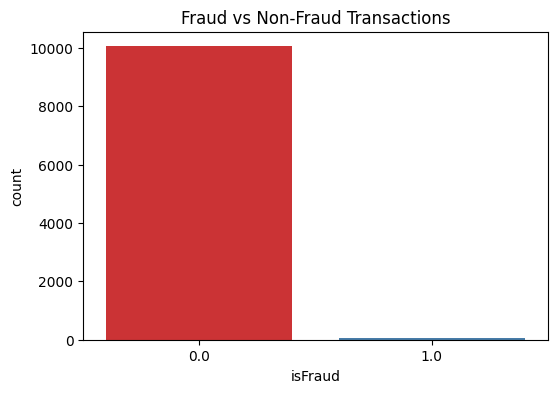

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Datasets.csv"
df = pd.read_csv(file_path)

df_describe = df.describe()

print(df_describe)

plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df, palette='Set1')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Datasets.csv"
df = pd.read_csv(file_path)

data_types=df.dtypes
missing_values = df.isnull().sum()
print(data_types,"\n\nMissing Values:\n",missing_values)

Unnamed: 0               int64
step                     int64
type                    object
branch                  object
amount                 float64
nameOrig                object
oldbalanceOrg          float64
newbalanceOrig         float64
nameDest                object
oldbalanceDest         float64
newbalanceDest         float64
unusuallogin             int64
isFlaggedFraud           int64
Acct type               object
Date of transaction     object
Time of day             object
isFraud                float64
dtype: object 

Missing Values:
 Unnamed: 0              0
step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 

2.Data Cleaning and Preprocessing:

o Handle Missing Values: Apply methods to manage missing data appropriately, either by imputation or removal, to ensure data integrity.

o Feature Engineering: Create new features that might help in detecting fraud, such as derived variables from transaction times or customer behavior patterns.

o Data Balancing: Address the class imbalance inherent in fraud detection datasets using techniques like SMOTE or random undersampling.

Handling missing values

In [ ]:
skewness = df.skew(numeric_only=True)
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Unnamed: 0         0.000000
step              -0.181078
amount            13.169771
oldbalanceOrg      2.779734
newbalanceOrig     2.738629
oldbalanceDest     3.909829
newbalanceDest     3.600117
unusuallogin       0.006952
isFlaggedFraud     0.000000
isFraud           12.080855
dtype: float64


In [ ]:
import pandas as pd
import numpy as np


print("Missing values in each column before handling:\n", df.isnull().sum())

numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in numerical column '{col}' with median value: {median_value}")

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        most_frequent = df[col].mode()[0]
        df[col].fillna(most_frequent, inplace=True)
        print(f"Filled missing values in categorical column '{col}' with most frequent value: '{most_frequent}'")

threshold = 0.5 * len(df)
df.dropna(thresh=threshold, axis=1, inplace=True)

df.dropna(thresh=len(df.columns) - 2, axis=0, inplace=True)

print("\nMissing values in each column after handling:\n", df.isnull().sum())
# print('Here')
# print(df['isFlaggedFraud'].sum())

Missing values in each column before handling:
 Unnamed: 0              0
step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64
Filled missing values in numerical column 'amount' with median value: 12798.31
Filled missing values in numerical column 'oldbalanceOrg' with median value: 21363.0
Filled missing values in numerical column 'oldbalanceDest' with median value: 0.0
Filled missing values in numerical column 'newbalanceDest' with median value: 0.0
Filled missing values in numerical column 'isFraud' with median value: 0.0
Filled missing values in categorical column 'type' with most frequent value: 'PAYMENT'
Filled 

Feature engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df['log_amount'] = np.log(df['amount'] + 1)
df['balance_change_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_change_dest'] = df['oldbalanceDest'] - df['newbalanceDest']
df['Date of transaction 1'] = pd.to_datetime(df['Date of transaction'], format='%m/%d/%Y', errors='coerce')
df['day_of_week'] = df['Date of transaction 1'].dt.dayofweek
df.drop(columns=['Date of transaction 1'], inplace=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
df[['scaled_oldbalanceOrg', 'scaled_newbalanceOrig', 'scaled_oldbalanceDest', 'scaled_newbalanceDest']] = scaled_features
df['amount_to_orig_balance'] = df['amount'] / (df['oldbalanceOrg'] + 1)
df['dest_balance_ratio'] = df['oldbalanceDest'] / (df['newbalanceDest'] + 1)
df.drop(columns=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'],inplace=True)

if 'Date of transaction' in df.columns:
    df['Date of transaction'] = pd.to_datetime(df['Date of transaction'], errors='coerce', dayfirst=True)
    df['transaction_year'] = df['Date of transaction'].dt.year
    df['transaction_month'] = df['Date of transaction'].dt.month
    df['transaction_day'] = df['Date of transaction'].dt.day
    df.drop(columns=['Date of transaction'], inplace=True)
df.head()

# df.columns

,Unnamed: 0,step,type,branch,amount,nameOrig,nameDest,unusuallogin,isFlaggedFraud,Acct type,...,day_of_week,scaled_oldbalanceOrg,scaled_newbalanceOrig,scaled_oldbalanceDest,scaled_newbalanceDest,amount_to_orig_balance,dest_balance_ratio,transaction_year,transaction_month,transaction_day
0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,M1979787155,9,0,Current,...,3.0,-0.335828,-0.342963,-0.348597,-0.363849,0.057834,0.0,2018,1,3
1,1,1,PAYMENT,India,1864.28,C1666544295,M2044282225,10,0,Savings,...,1.0,-0.405916,-0.407904,-0.348597,-0.363849,0.087731,0.0,2018,1,5
2,2,1,TRANSFER,India,181.00,C1305486145,C553264065,2,0,Current,...,6.0,-0.415834,-0.416838,-0.348597,-0.363849,0.994505,0.0,2018,1,7
3,3,1,CASH_OUT,Australia,181.00,C840083671,C38997010,1,0,Current,...,4.0,-0.415834,-0.416838,-0.340686,-0.363849,0.994505,21182.0,2018,1,6
4,4,1,PAYMENT,Australia,11668.14,C2048537720,M1230701703,17,0,Current,...,4.0,-0.396358,-0.403064,-0.348597,-0.363849,0.280788,0.0,2018,1,6


In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['type', 'branch', 'Acct type', 'day_of_week', 'nameOrig', 'nameDest', 'Time of day']

df_encoded = df.copy()

label_encoder = LabelEncoder()

for col in columns_to_encode:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])


import pandas as pd

null_values = df_encoded.isnull().sum()

print("Number of null values in each column:\n", null_values)

Number of null values in each column:
 Unnamed: 0                0
step                      0
type                      0
branch                    0
amount                    0
nameOrig                  0
nameDest                  0
unusuallogin              0
isFlaggedFraud            0
Acct type                 0
Time of day               0
isFraud                   0
log_amount                0
balance_change_orig       0
balance_change_dest       0
day_of_week               0
scaled_oldbalanceOrg      0
scaled_newbalanceOrig     0
scaled_oldbalanceDest     0
scaled_newbalanceDest     0
amount_to_orig_balance    0
dest_balance_ratio        0
transaction_year          0
transaction_month         0
transaction_day           0
dtype: int64


Data balancing

Using SMOTE

Unnamed: 0                0
step                      0
type                      0
branch                    0
amount                    0
nameOrig                  0
nameDest                  0
unusuallogin              0
isFlaggedFraud            0
Acct type                 0
Time of day               0
isFraud                   0
log_amount                0
balance_change_orig       0
balance_change_dest       0
day_of_week               0
scaled_oldbalanceOrg      0
scaled_newbalanceOrig     0
scaled_oldbalanceDest     0
scaled_newbalanceDest     0
amount_to_orig_balance    0
dest_balance_ratio        0
transaction_year          0
transaction_month         0
transaction_day           0
dtype: int64


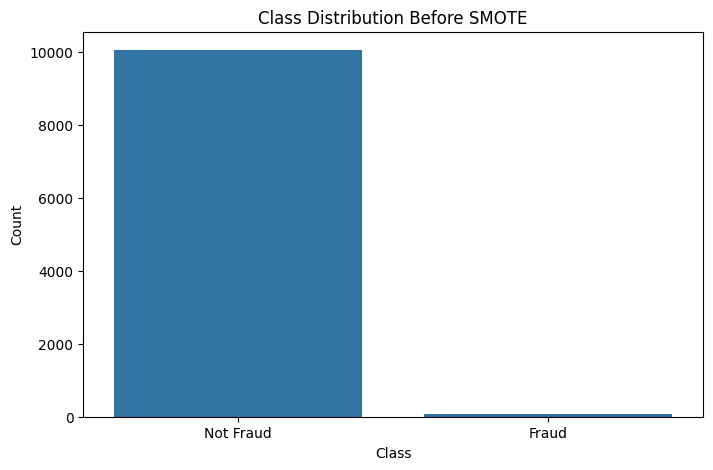

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

print(df_encoded.isnull().sum())

X = df_encoded.drop(columns=['isFraud'])
y = df_encoded['isFraud']

plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.show()

SMOTE

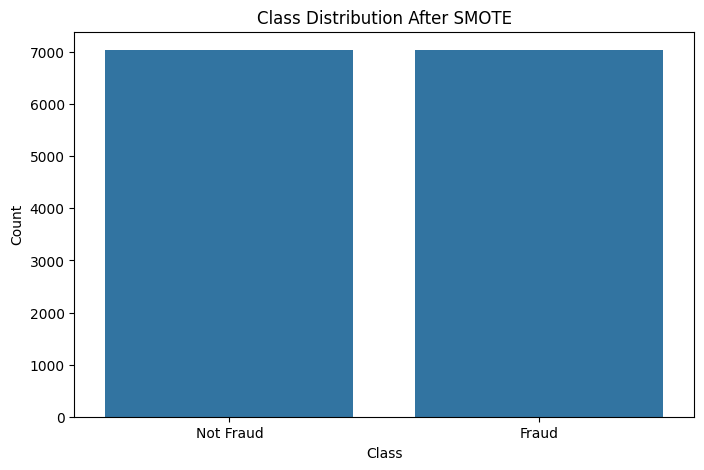

Original training dataset shape: isFraud
0.0    7040
1.0      48
Name: count, dtype: int64
Resampled training dataset shape: isFraud
0.0    7040
1.0    7040
Name: count, dtype: int64


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# print(X_train_resampled)

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.show()

print("Original training dataset shape:", y_train.value_counts())
print("Resampled training dataset shape:", pd.Series(y_train_resampled).value_counts())

3. Exploratory Data Analysis (EDA):
o Statistical Analysis: Conduct descriptive statistics to get insights into the data’s central tendencies and variability.

o Visualization: Use plots such as histograms, box plots, and scatter plots to visualize distributions and detect outliers or unusual patterns.

o Correlation Analysis: Examine relationships between different features and the target variable to identify potentially predictive relationships.

Statistical Analysis

Descriptive Statistics:
         Unnamed: 0          step          type        branch        amount   
count  10127.000000  10127.000000  10127.000000  10127.000000  1.012700e+04  \
mean    5063.000000      4.214279      2.216649     51.352227  1.048687e+05   
std     2923.557422      2.484139      1.333366     33.425392  2.706133e+05   
min        0.000000      1.000000      0.000000      0.000000  2.390000e+00   
25%     2531.500000      1.000000      1.000000     25.000000  4.397480e+03   
50%     5063.000000      5.000000      3.000000     44.000000  1.279831e+04   
75%     7594.500000      7.000000      3.000000     78.000000  1.143687e+05   
max    10126.000000      7.000000      4.000000    134.000000  1.000000e+07   

           nameOrig      nameDest  unusuallogin  isFlaggedFraud     Acct type   
count  10127.000000  10127.000000  10127.000000         10127.0  10127.000000  \
mean    5057.002074   2261.210428     10.513183             0.0      0.690925   
std     2923.553833  

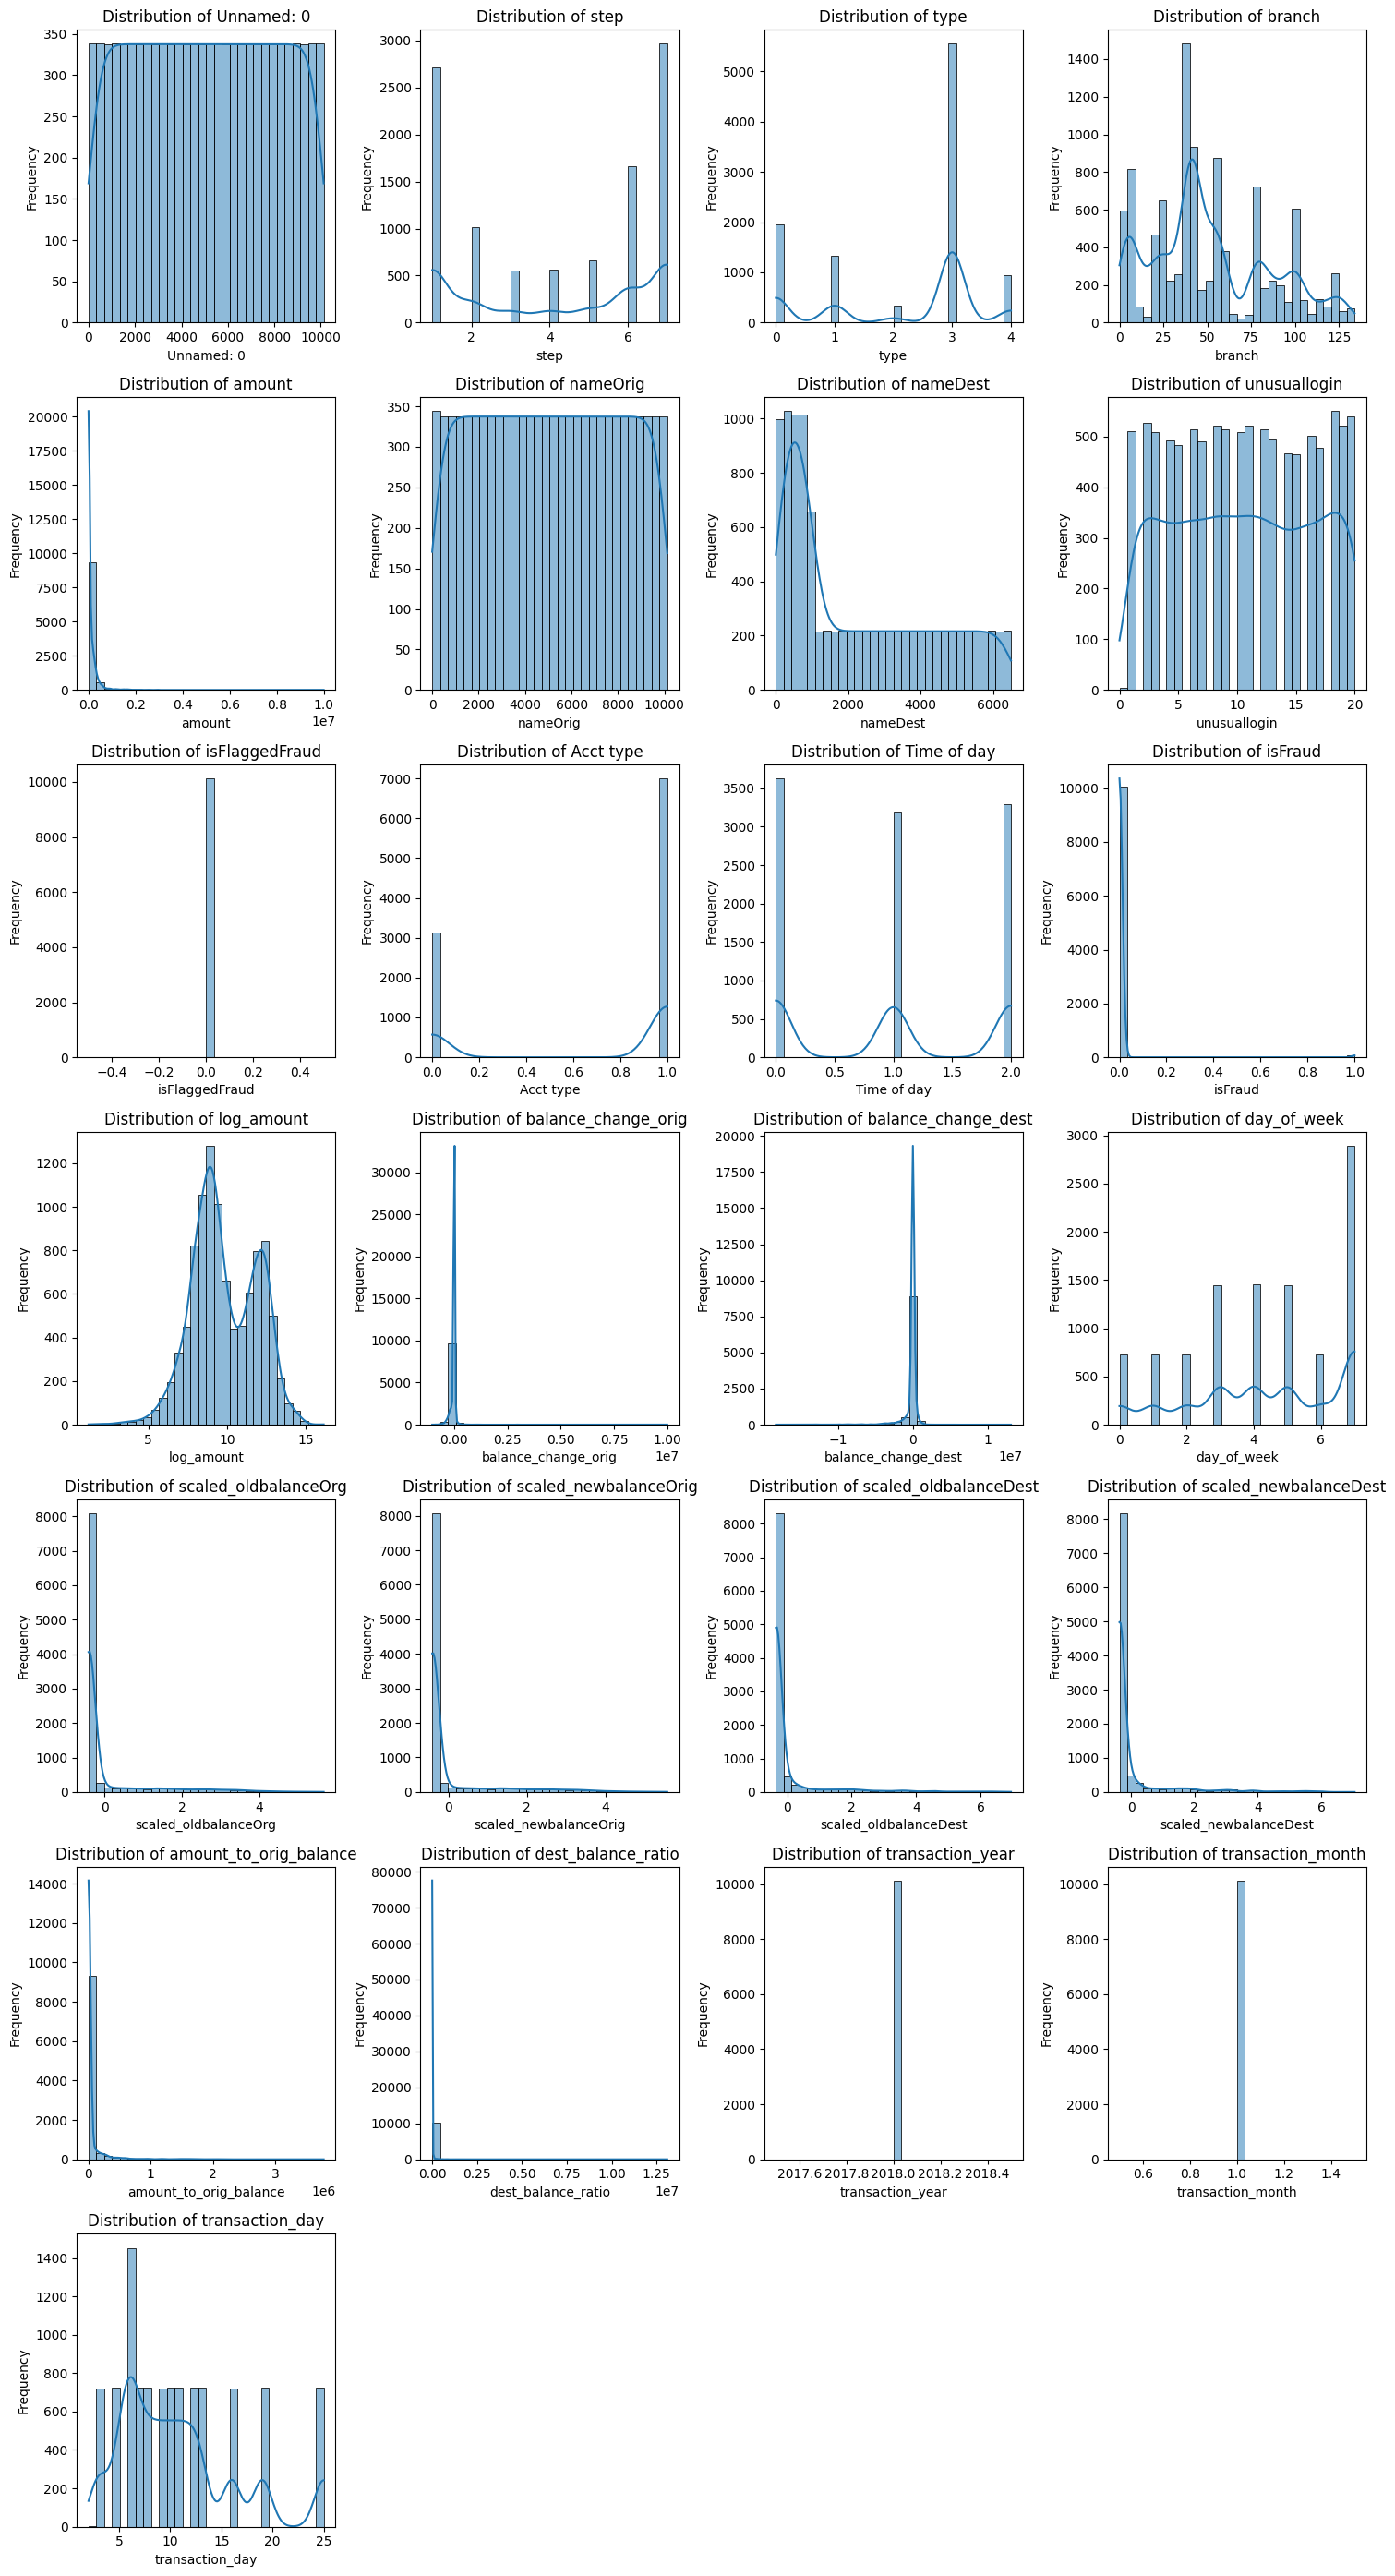

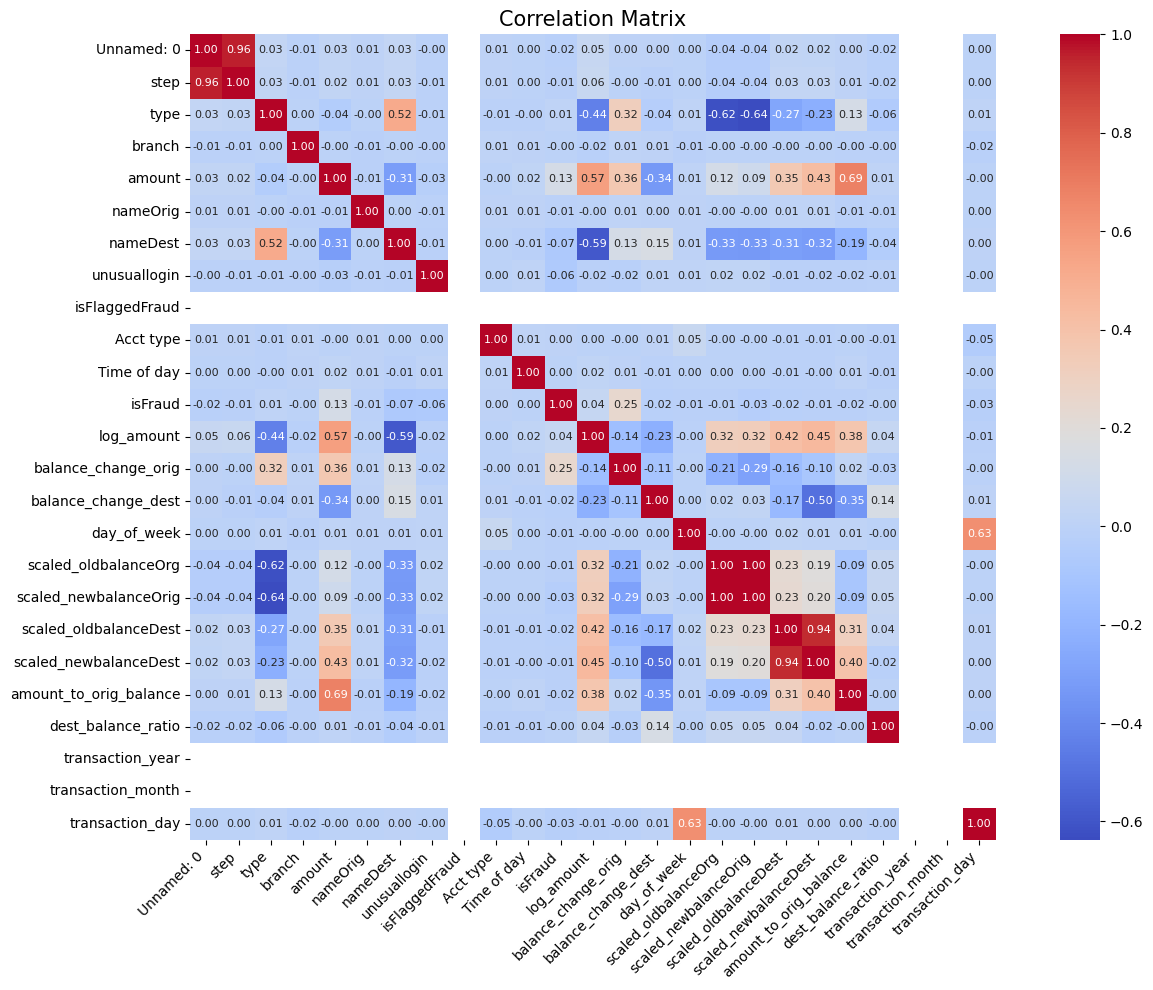


Statistical Analysis of Target Variable (Fraud):
isFraud
0.0    99.328528
1.0     0.671472
Name: proportion, dtype: float64

Summary Statistics by Fraud Class:
        Unnamed: 0                                                            
             count         mean          std  min      25%     50%      75%   
isFraud                                                                       
0.0        10059.0  5067.595487  2926.930181  0.0  2530.50  5069.0  7609.50  \
1.0           68.0  4383.205882  2289.185631  2.0  3059.75  4680.5  5994.25   

                     step            ... transaction_month        
             max    count      mean  ...               75%  max   
isFraud                              ...                          
0.0      10126.0  10059.0  4.216920  ...               1.0  1.0  \
1.0       9285.0     68.0  3.823529  ...               1.0  1.0   

        transaction_day                                                   
                  count       me

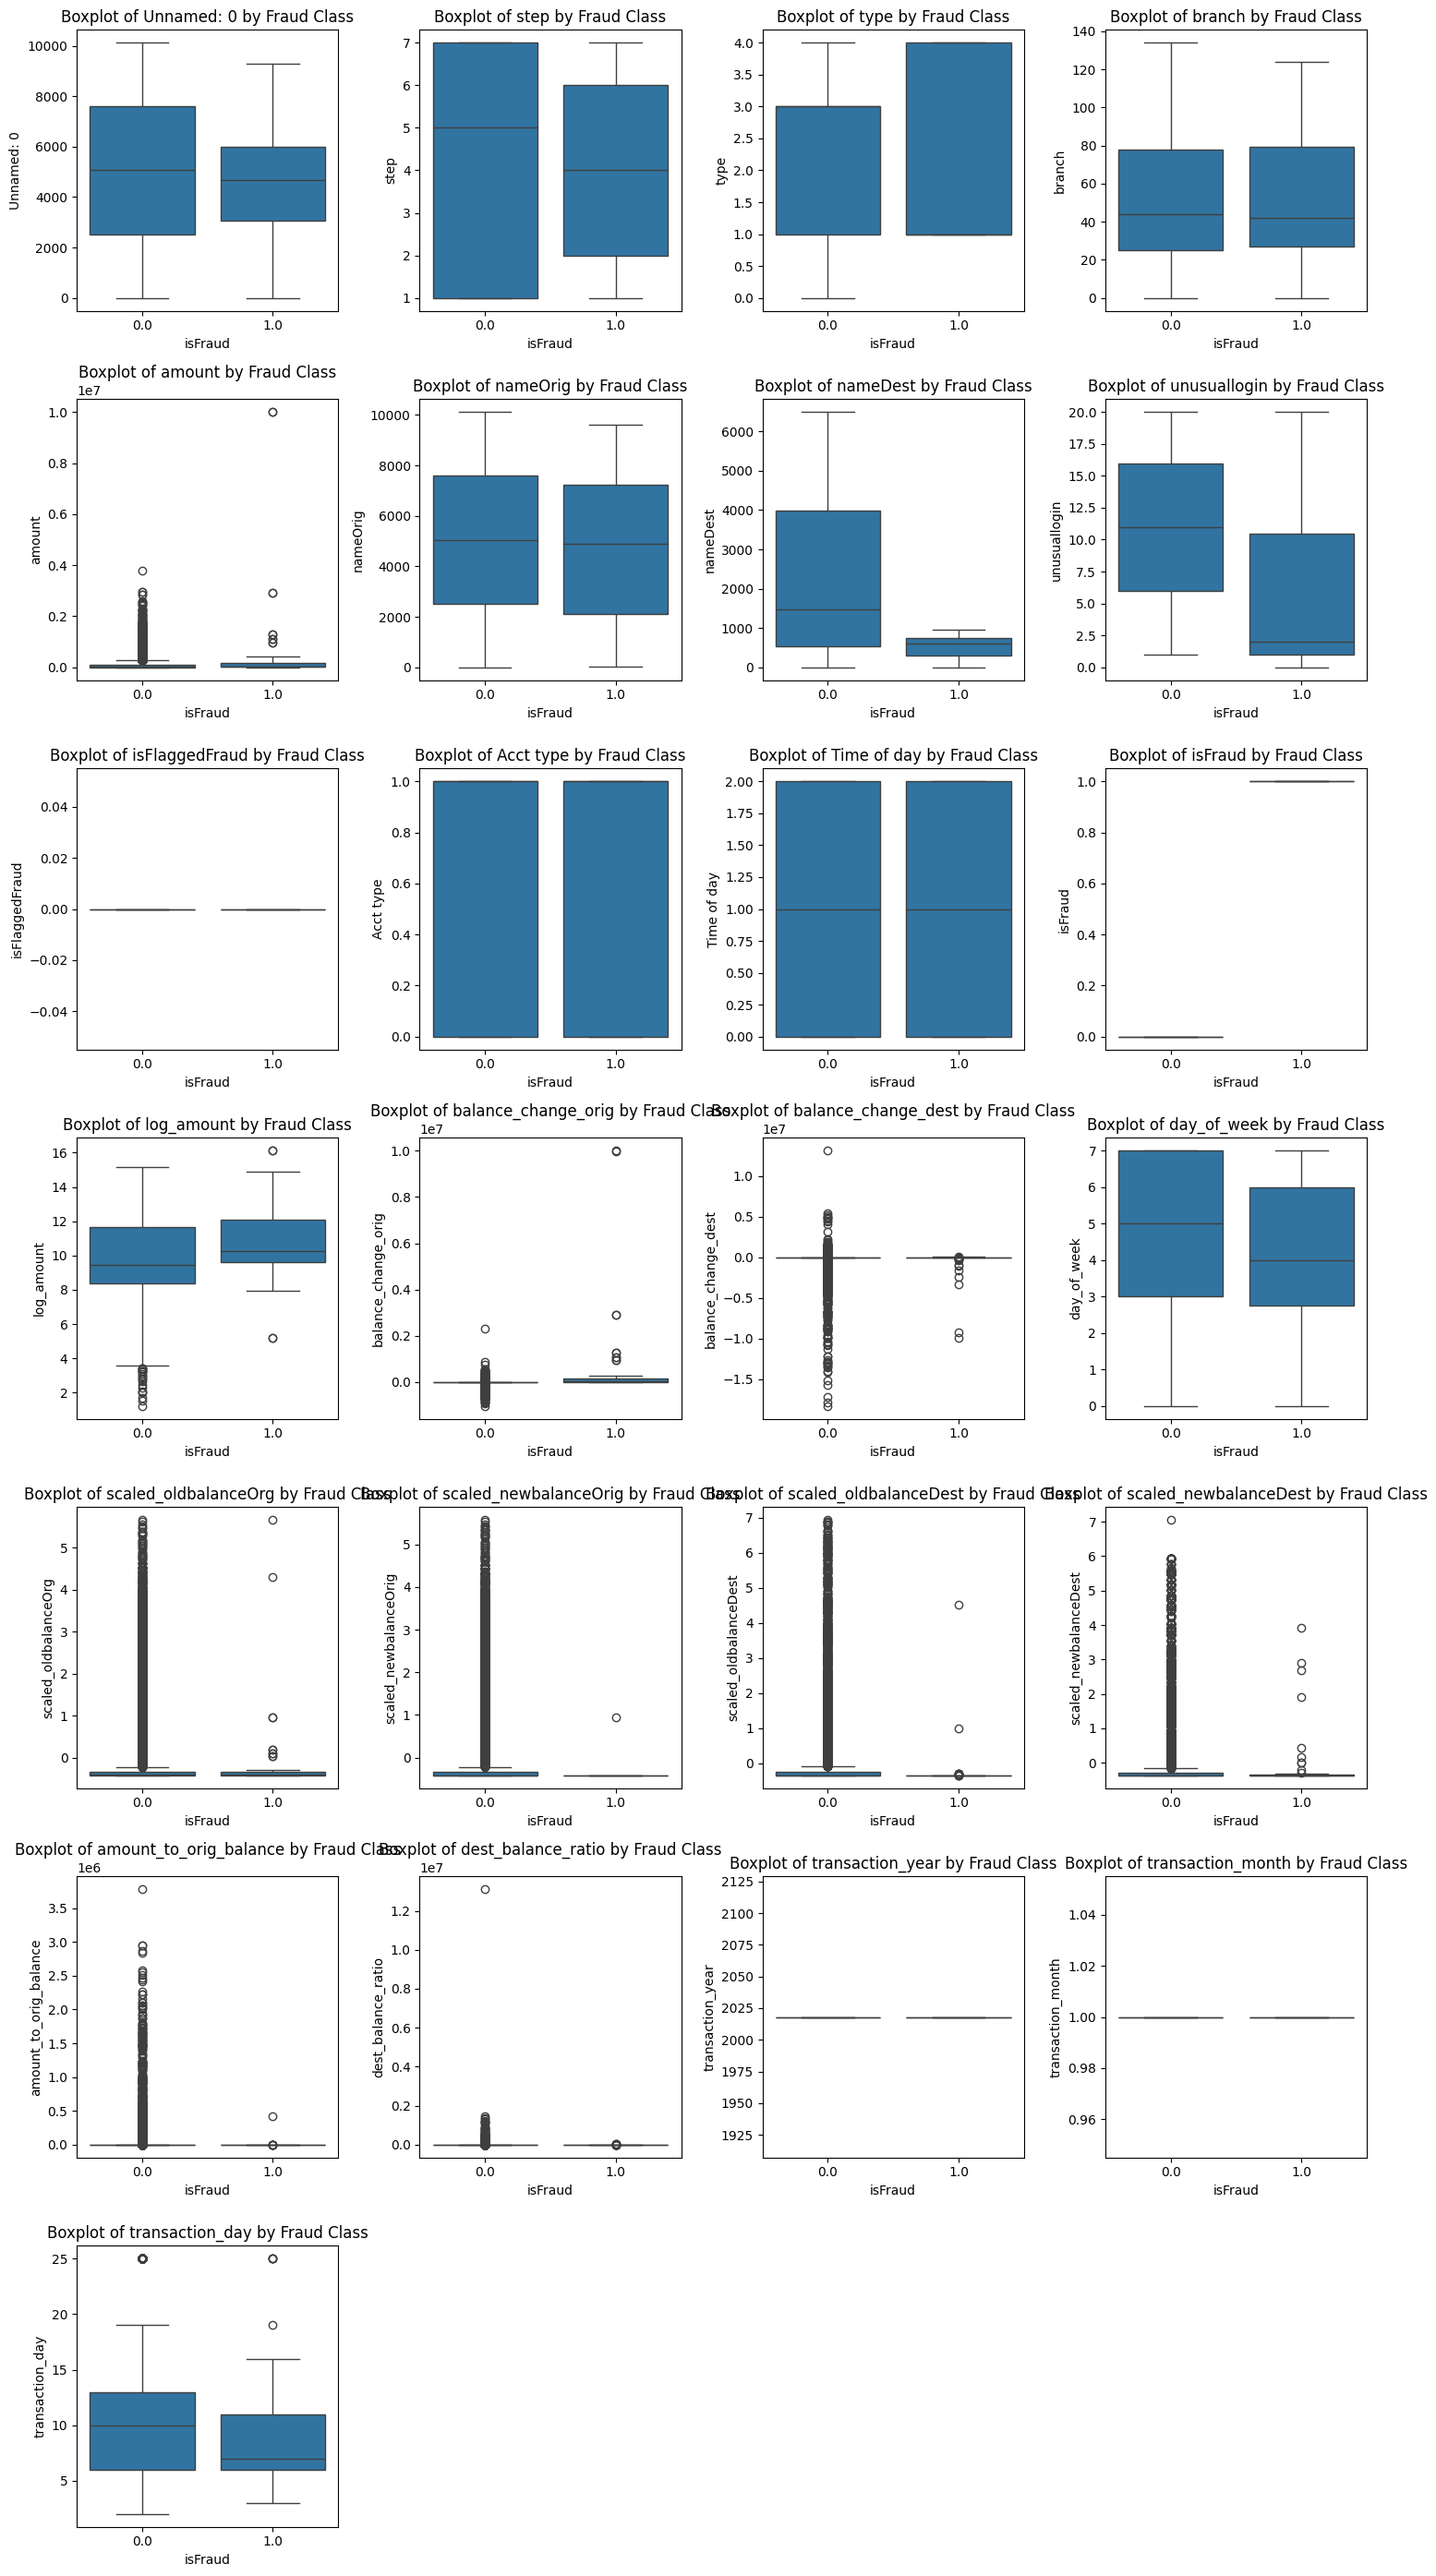

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# df_encoded = pd.read_csv('processed_dataset.csv')


print("Descriptive Statistics:")
print(df_encoded.describe())


numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()


num_cols = 4
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_encoded[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
correlation_matrix = df_encoded[numerical_cols].corr()
plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Correlation Matrix', fontsize=15)
plt.tight_layout()
plt.show()

fraud_stats = df_encoded['isFraud'].value_counts(normalize=True) * 100
print("\nStatistical Analysis of Target Variable (Fraud):")
print(fraud_stats)

print("\nSummary Statistics by Fraud Class:")
print(df_encoded.groupby('isFraud').describe())

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='isFraud', y=col, data=df_encoded)
    plt.title(f'Boxplot of {col} by Fraud Class')

plt.tight_layout()
plt.show()


C:\Users\WORK-HOME\AppData\Local\Temp\ipykernel_13624\2747740841.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_count_by_type, x='type', y='fraud_count', palette='coolwarm')


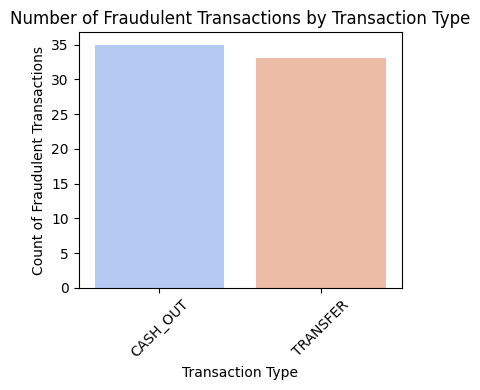

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fraud_df = df[df['isFraud'] == 1]

fraud_count_by_type = fraud_df['type'].value_counts().reset_index()
fraud_count_by_type.columns = ['type', 'fraud_count']

plt.figure(figsize=(4, 4))
sns.barplot(data=fraud_count_by_type, x='type', y='fraud_count', palette='coolwarm')
plt.title('Number of Fraudulent Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


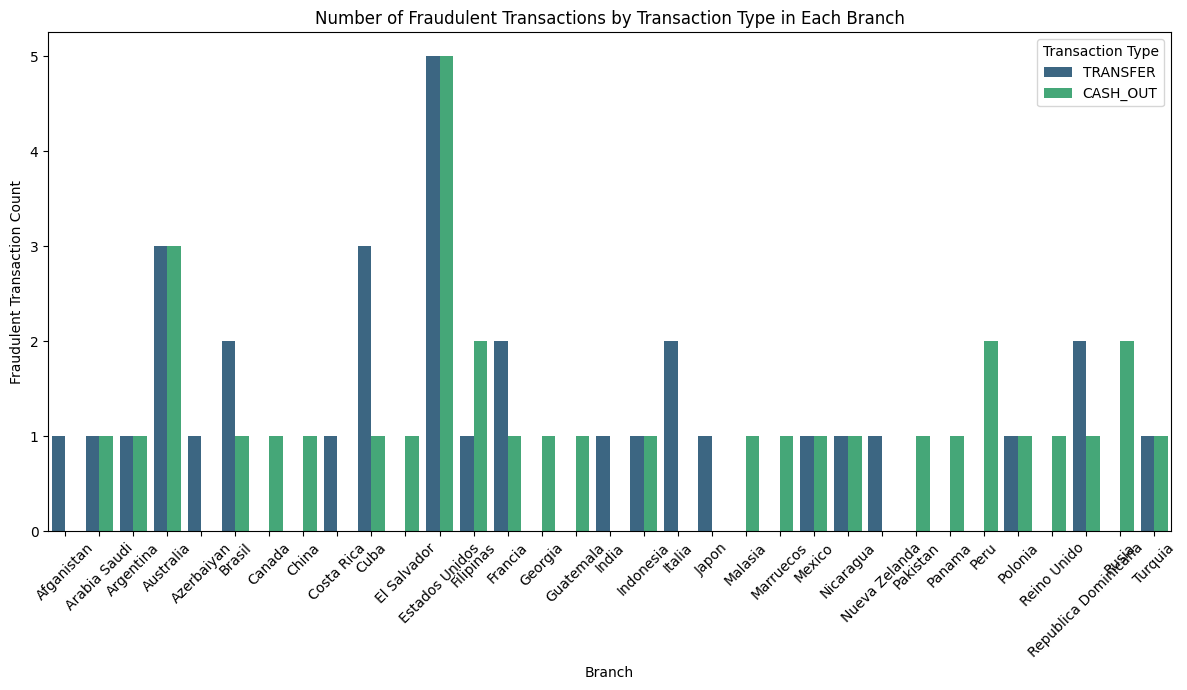

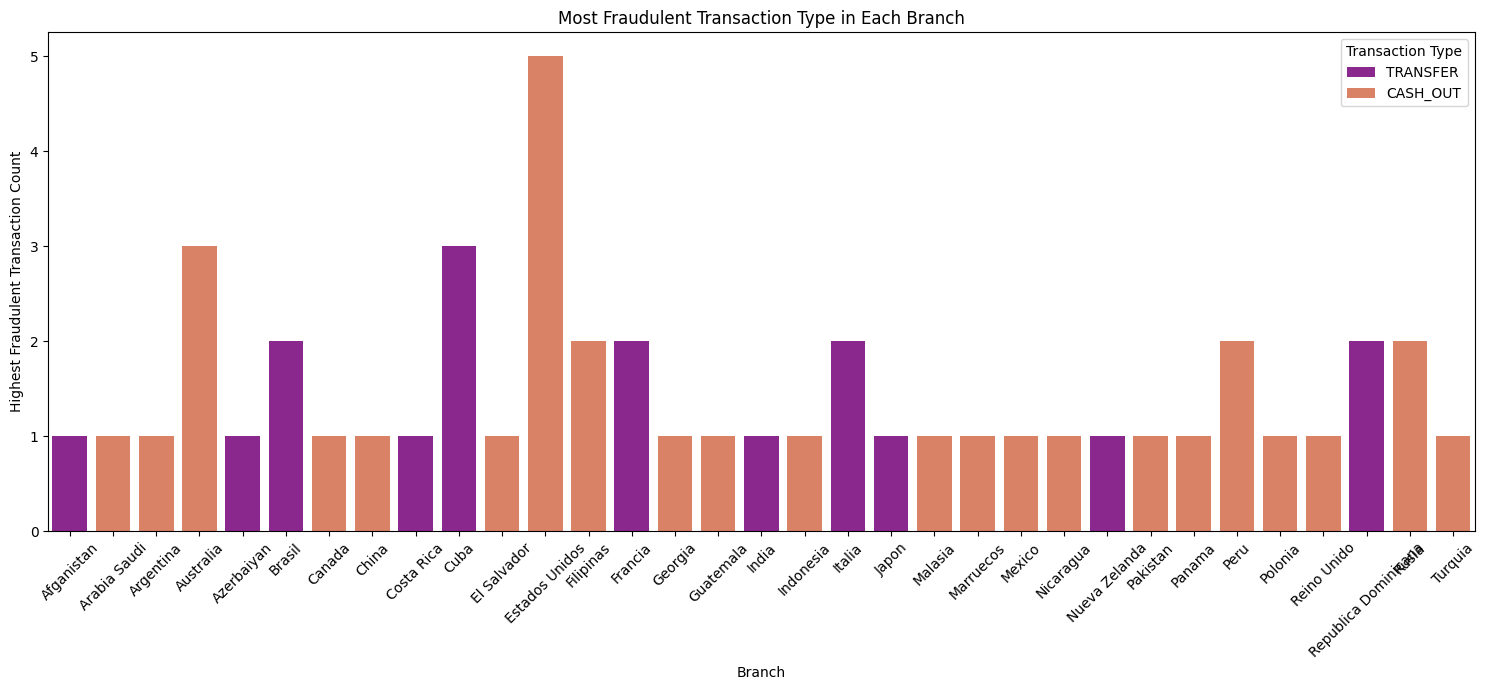

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fraud_df = df[df['isFraud'] == 1]

fraud_count_by_type_branch = fraud_df.groupby(['branch', 'type']).size().reset_index(name='fraud_count')

top_fraud_type_by_branch = fraud_count_by_type_branch.loc[
    fraud_count_by_type_branch.groupby('branch')['fraud_count'].idxmax()
]

#Count of fraudulent transactions for each transaction type in each branch
plt.figure(figsize=(12, 7))
sns.barplot(data=fraud_count_by_type_branch, x='branch', y='fraud_count', hue='type', palette='viridis')
plt.title('Number of Fraudulent Transactions by Transaction Type in Each Branch')
plt.xlabel('Branch')
plt.ylabel('Fraudulent Transaction Count')
plt.legend(title='Transaction Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Transaction type with the most fraudulent transfers in each branch
plt.figure(figsize=(15, 7))
sns.barplot(data=top_fraud_type_by_branch, x='branch', y='fraud_count', hue='type', dodge=False, palette='plasma')
plt.title('Most Fraudulent Transaction Type in Each Branch')
plt.xlabel('Branch')
plt.ylabel('Highest Fraudulent Transaction Count')
plt.legend(title='Transaction Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\WORK-HOME\AppData\Local\Temp\ipykernel_13624\4181208705.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_count_by_acct_type, x='Acct type', y='fraud_count', palette='coolwarm')


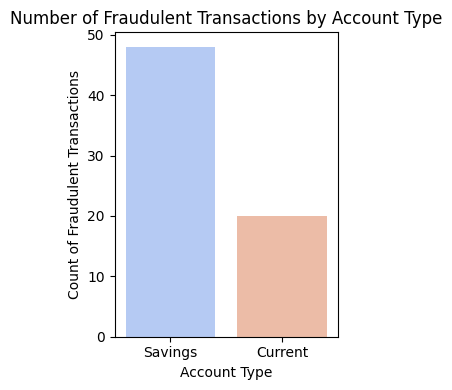

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fraud_df = df[df['isFraud'] == 1]

fraud_count_by_acct_type = fraud_df['Acct type'].value_counts().reset_index()
fraud_count_by_acct_type.columns = ['Acct type', 'fraud_count']

plt.figure(figsize=(3, 4))
sns.barplot(data=fraud_count_by_acct_type, x='Acct type', y='fraud_count', palette='coolwarm')
plt.title('Number of Fraudulent Transactions by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Count of Fraudulent Transactions')
plt.tight_layout()
plt.show()


C:\Users\WORK-HOME\AppData\Local\Temp\ipykernel_13624\3526704052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='branch', palette='viridis')


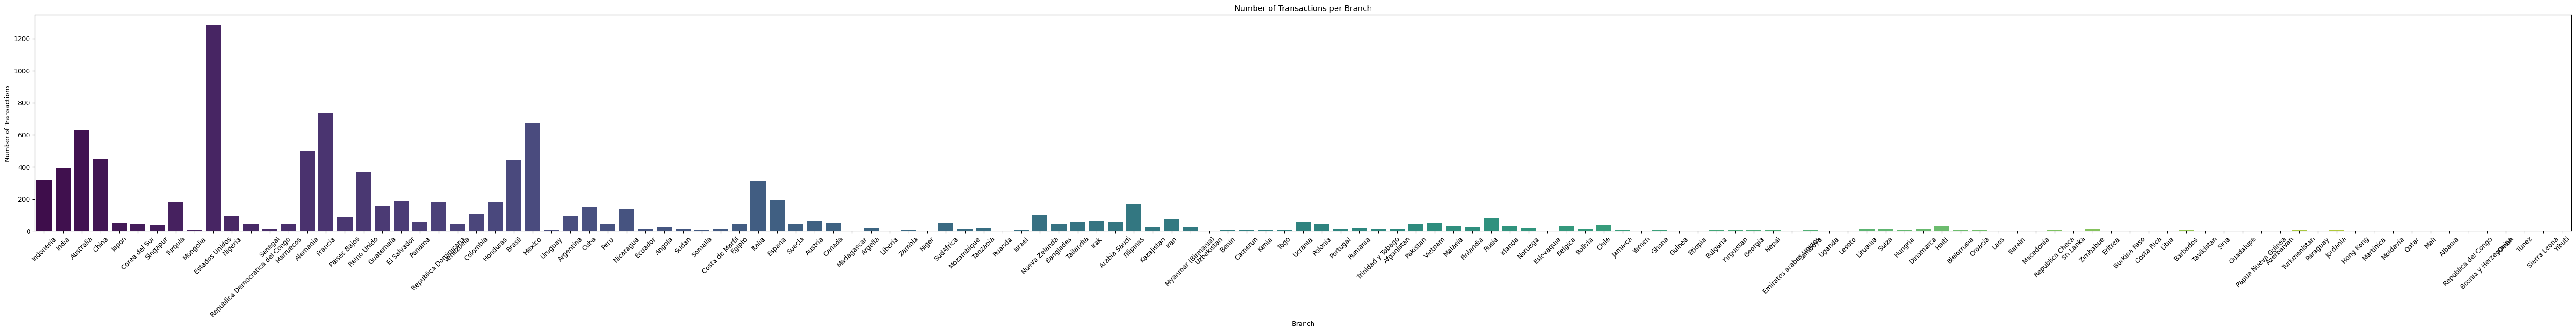

C:\Users\WORK-HOME\AppData\Local\Temp\ipykernel_13624\3526704052.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=branch_amount, x='branch', y='amount', palette='magma')


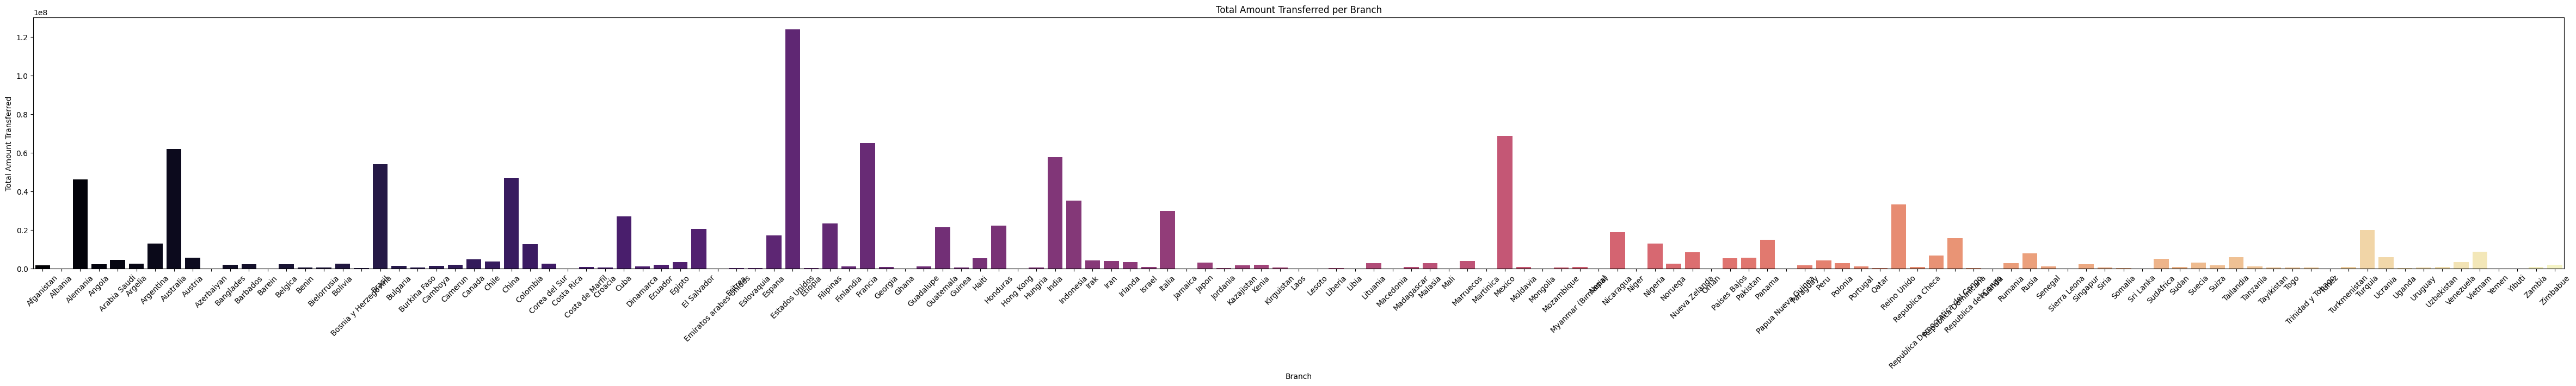

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. branch and number of transactions
plt.figure(figsize=(70, 6))
sns.countplot(data=df, x='branch', palette='viridis')
plt.title('Number of Transactions per Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# 2. branch and total amount transferred
branch_amount = df.groupby('branch')['amount'].sum().reset_index()

plt.figure(figsize=(60, 6))
sns.barplot(data=branch_amount, x='branch', y='amount', palette='magma')
plt.title('Total Amount Transferred per Branch')
plt.xlabel('Branch')
plt.ylabel('Total Amount Transferred')
plt.xticks(rotation=45)
plt.show()


C:\Users\WORK-HOME\AppData\Local\Temp\ipykernel_13624\1879990203.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amount_range_counts.index, y=amount_range_counts.values, palette='coolwarm')


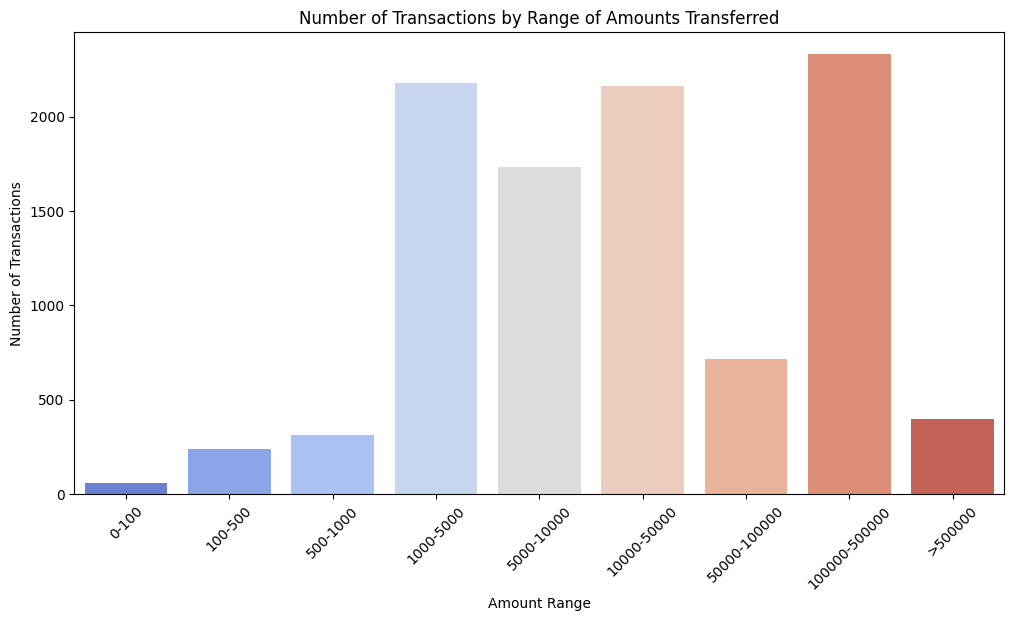

<Figure size 1400x800 with 0 Axes>

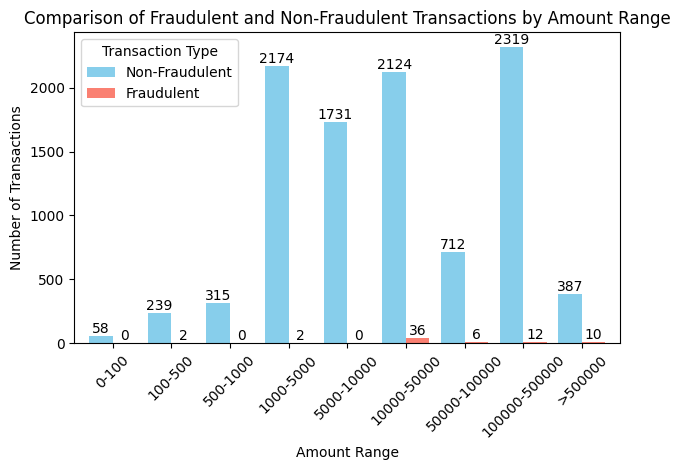

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

amount_bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, df['amount'].max()]
amount_labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', '50000-100000', '100000-500000', '>500000']

df['amount_range'] = pd.cut(df['amount'], bins=amount_bins, labels=amount_labels, include_lowest=True)


amount_range_counts = df['amount_range'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=amount_range_counts.index, y=amount_range_counts.values, palette='coolwarm')
plt.title('Number of Transactions by Range of Amounts Transferred')
plt.xlabel('Amount Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


amount_bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, df['amount'].max()]
amount_labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', '50000-100000', '100000-500000', '>500000']

df['amount_range'] = pd.cut(df['amount'], bins=amount_bins, labels=amount_labels, include_lowest=True)

amount_range_fraud_counts = df.groupby(['amount_range', 'isFraud']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
ax=amount_range_fraud_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], width=0.8)

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.title('Comparison of Fraudulent and Non-Fraudulent Transactions by Amount Range')
plt.xlabel('Amount Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(['Non-Fraudulent', 'Fraudulent'], title="Transaction Type")
plt.tight_layout()
plt.show()


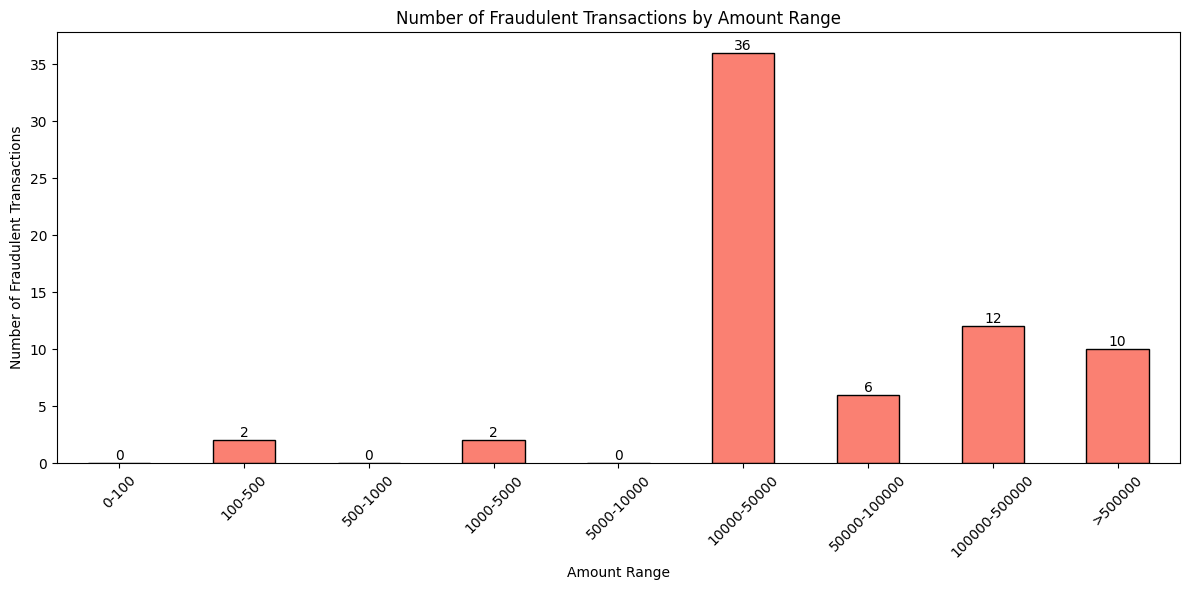

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

amount_bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, df['amount'].max()]
amount_labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', '50000-100000', '100000-500000', '>500000']

df['amount_range'] = pd.cut(df['amount'], bins=amount_bins, labels=amount_labels, include_lowest=True)

fraud_df = df[df['isFraud'] == 1]

fraud_count_by_amount_range = fraud_df['amount_range'].value_counts().reindex(amount_labels)

plt.figure(figsize=(12, 6))
ax = fraud_count_by_amount_range.plot(kind='bar', color='salmon', edgecolor='black')

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.title('Number of Fraudulent Transactions by Amount Range')
plt.xlabel('Amount Range')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



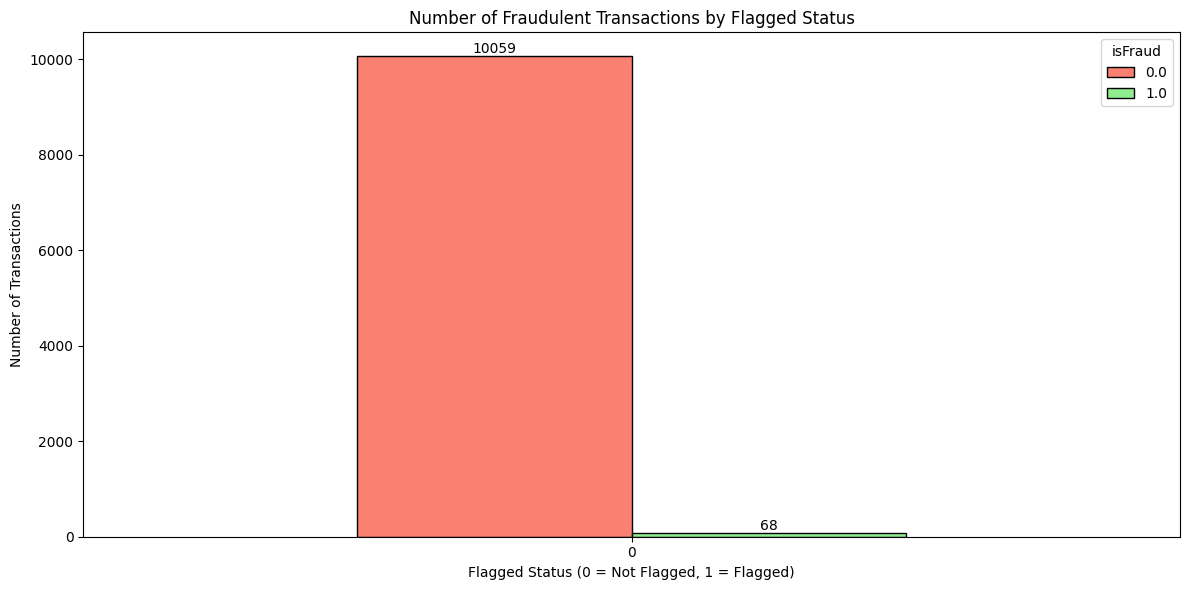

0

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


fraud_flagged_counts = df.groupby(['isFlaggedFraud', 'isFraud']).size().unstack(fill_value=0)

ax=fraud_flagged_counts.plot(kind='bar', stacked=False, color=['salmon', 'lightgreen'], edgecolor='black', figsize=(12, 6))

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2, height, str(height), ha='center', va='bottom')


plt.title('Number of Fraudulent Transactions by Flagged Status')
plt.xlabel('Flagged Status (0 = Not Flagged, 1 = Flagged)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

df['isFlaggedFraud'].sum()


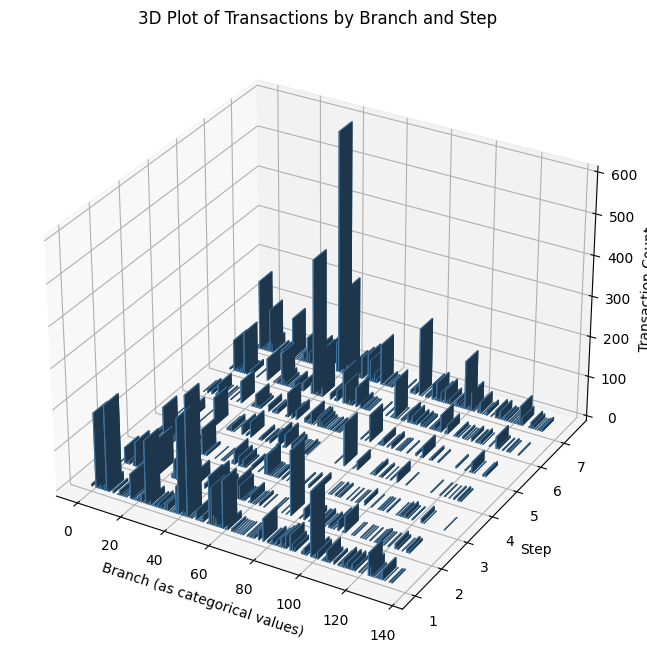

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

branch_step_counts = df.groupby(['branch', 'step']).size().reset_index(name='transaction_count')


branch_step_counts['branch'] = branch_step_counts['branch'].astype('category').cat.codes
branch_step_counts['step'] = branch_step_counts['step'].astype(int)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = branch_step_counts['branch']
y = branch_step_counts['step']
z = [0] * len(branch_step_counts)
dx = dy = 0.5
dz = branch_step_counts['transaction_count']

ax.bar3d(x, y, z, dx, dy, dz, color='steelblue')

ax.set_xlabel('Branch (as categorical values)')
ax.set_ylabel('Step')
ax.set_zlabel('Transaction Count')
plt.title('3D Plot of Transactions by Branch and Step')
plt.show()

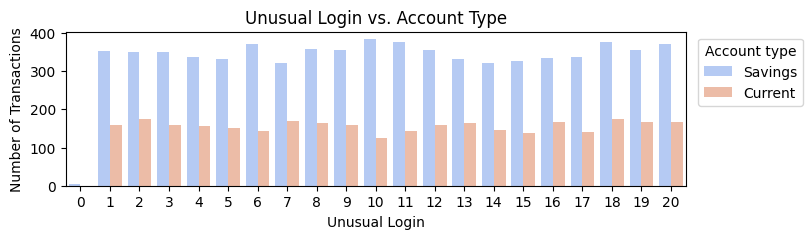

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

unusual_login_acct_type = df.groupby(['unusuallogin', 'Acct type']).size().reset_index(name='count')

plt.figure(figsize=(8, 2))
sns.barplot(data=unusual_login_acct_type, x='unusuallogin', y='count', hue='Acct type', palette='coolwarm')
plt.xlabel('Unusual Login')
plt.ylabel('Number of Transactions')
plt.title('Unusual Login vs. Account Type')
plt.legend(title='Account type',bbox_to_anchor=(1.2, 1),loc='upper right')
plt.show()


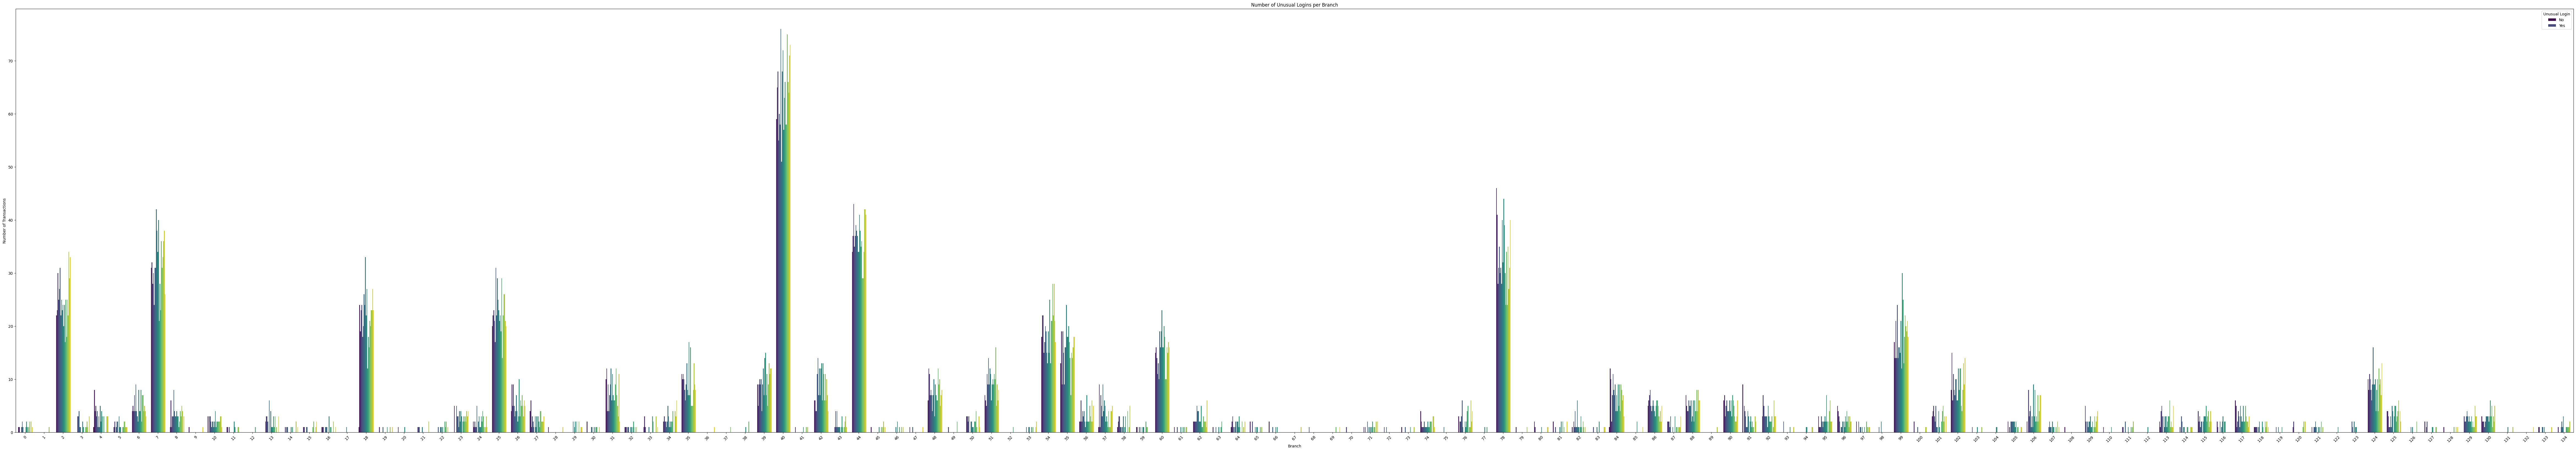

In [ ]:
unusual_login_branch = df_encoded.pivot_table(index='branch', columns='unusuallogin', aggfunc='size', fill_value=0)

plt.figure(figsize=(120, 20))
sns.countplot(data=df_encoded, x='branch', hue='unusuallogin', palette='viridis')
plt.xlabel('Branch')
plt.ylabel('Number of Transactions')
plt.title('Number of Unusual Logins per Branch')
plt.legend(title='Unusual Login', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


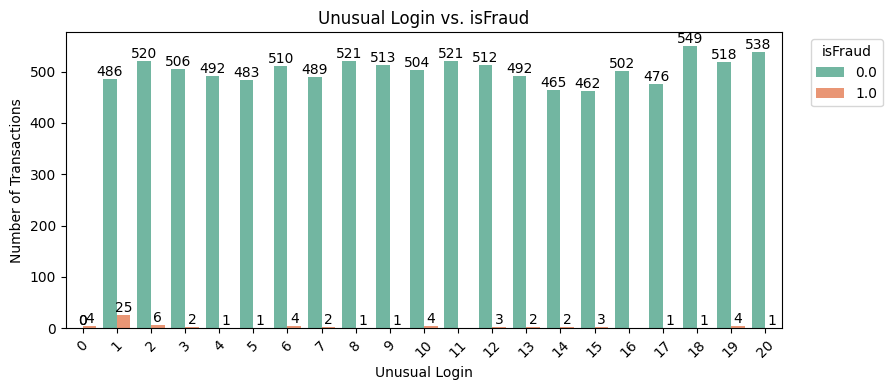

ValueError: Bin edges must be unique: array([ 0,  1,  2,  5, 10, 20, 20], dtype=int64).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

unusual_login_isfraud = df.groupby(['unusuallogin', 'isFraud']).size().reset_index(name='count')

plt.figure(figsize=(9, 4))
ax = sns.barplot(data=unusual_login_isfraud, x='unusuallogin', y='count', hue='isFraud', palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.xlabel('Unusual Login')
plt.ylabel('Number of Transactions')
plt.title('Unusual Login vs. isFraud')
plt.xticks(rotation=45)
plt.legend(title='isFraud',bbox_to_anchor=(1.15,1))
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0, 1, 2, 5, 10, 20, df['unusuallogin'].max()]
labels = ['0', '1', '2-5', '6-10', '11-20', '21+']
df['unusuallogin_range'] = pd.cut(df['unusuallogin'], bins=bins, labels=labels)

fraud_data = df[df['isFraud'] == 1]

unusual_login_fraud_counts = fraud_data['unusuallogin_range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=unusual_login_fraud_counts.index, y=unusual_login_fraud_counts.values, palette='coolwarm')
plt.xlabel('Unusual Login Range')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions by Unusual Login Range')
plt.show()


In [ ]:
df.to_csv('processed_dataset.csv', index=False)

4. Predictive Modeling

o Model Selection: Evaluate different machine learning algorithms, including logistic regression, decision trees, ensemble methods like Random Forests and Gradient Boosting, and neural networks.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import xgboost as xgb
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# X = df_encoded.drop(columns=['isFraud'])
# y = df_encoded['isFraud']

# X_train_scaled, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_train_scaled, y_train, X_test, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
    print("="*50)

logreg = LogisticRegression(solver='liblinear')
evaluate_model(logreg, X_train_scaled, y_train_resampled, X_test_scaled, y_test)

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5, random_state=42)
evaluate_model(decision_tree, X_train_scaled, y_train_resampled, X_test, y_test)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(random_forest, X_train_scaled, y_train_resampled, X_test, y_test)

xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgboost, X_train_scaled, y_train_resampled, X_test, y_test)

# nn_model = Sequential()
# nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
# nn_model.add(Dense(32, activation='relu'))
# nn_model.add(Dense(1, activation='sigmoid'))

# nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

# accuracy_nn = accuracy_score(y_test, y_pred_nn)
# precision_nn = precision_score(y_test, y_pred_nn)
# recall_nn = recall_score(y_test, y_pred_nn)
# f1_nn = f1_score(y_test, y_pred_nn)
# auc_nn = roc_auc_score(y_test, nn_model.predict(X_test_scaled))

# print("Model: Neural Network")
# print(f"Accuracy: {accuracy_nn:.4f}")
# print(f"Precision: {precision_nn:.4f}")
# print(f"Recall: {recall_nn:.4f}")
# print(f"F1-Score: {f1_nn:.4f}")
# print(f"AUC: {auc_nn:.4f}")
# print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_nn)}")
# print("="*50)

Model: LogisticRegression
Accuracy: 0.9450
Precision: 0.0751
Recall: 0.6500
F1-Score: 0.1347
AUC: 0.9064
Confusion Matrix:
 [[2859  160]
 [   7   13]]


c:\Users\WORK-HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\WORK-HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WORK-HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Model: DecisionTreeClassifier
Accuracy: 0.9934
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC: 0.4995
Confusion Matrix:
 [[3019    0]
 [  20    0]]


c:\Users\WORK-HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\WORK-HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WORK-HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\WORK-HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:17:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\lear

Model: RandomForestClassifier
Accuracy: 0.9934
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC: 0.4934
Confusion Matrix:
 [[3019    0]
 [  20    0]]
Model: XGBClassifier
Accuracy: 0.9934
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC: 0.5966
Confusion Matrix:
 [[3019    0]
 [  20    0]]


c:\Users\WORK-HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyperparameter tuninng

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train_resampled)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


Index(['Unnamed: 0', 'step', 'type', 'branch', 'amount', 'nameOrig',
       'nameDest', 'unusuallogin', 'isFlaggedFraud', 'Acct type',
       'Time of day', 'log_amount', 'balance_change_orig',
       'balance_change_dest', 'day_of_week', 'scaled_oldbalanceOrg',
       'scaled_newbalanceOrig', 'scaled_oldbalanceDest',
       'scaled_newbalanceDest', 'amount_to_orig_balance', 'dest_balance_ratio',
       'transaction_year', 'transaction_month', 'transaction_day'],
      dtype='object')
[0.00000000e+00 4.82327755e-03 1.97321993e-02 8.80422857e-04
 0.00000000e+00 1.39141584e-03 1.38273150e-01 2.41780682e-03
 0.00000000e+00 2.77255245e-04 0.00000000e+00 0.00000000e+00
 5.70065204e-01 1.28321608e-02 9.40157688e-04 1.57368461e-02
 3.48105571e-02 9.14329687e-03 0.00000000e+00 1.71246965e-01
 1.63503599e-02 0.00000000e+00 0.00000000e+00 1.07892506e-03]


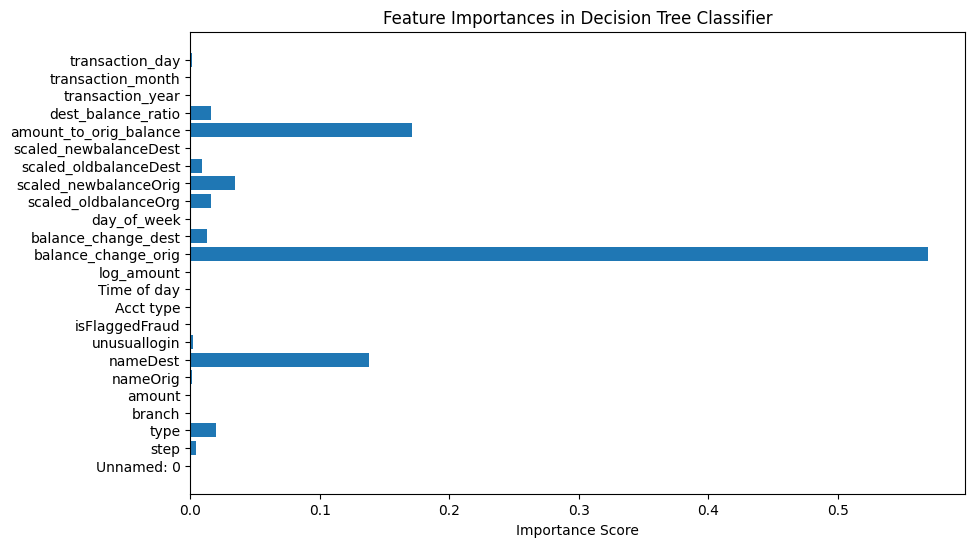

In [ ]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
features = X_train.columns

print(features)
print(importances)

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importances in Decision Tree Classifier")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,classification_report,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# X = df_encoded[['newbalanceOrig', 'balance_change_orig', 'amount_to_orig_balance', 'nameDest']]  # Using top features
# y = df_encoded['isFraud']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, random_state=42)

cv_scores = cross_val_score(dt_model, X_train_scaled, y_train_resampled, cv=5, scoring='roc_auc')
print("Cross-Validation AUC Scores:", cv_scores)
print("Mean CV AUC Score:", cv_scores.mean())

dt_model.fit(X_train_scaled, y_train_resampled)

y_pred = dt_model.predict(X_test_scaled)
y_pred_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.4f})", color='blue')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc='lower right')
# plt.grid(alpha=0.3)
# plt.show()

Cross-Validation AUC Scores: [0.99822443 0.99857955 0.99680398 0.9975142  0.99928977]
Mean CV AUC Score: 0.9980823863636363
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3019
         1.0       0.73      0.80      0.76        20

    accuracy                           1.00      3039
   macro avg       0.86      0.90      0.88      3039
weighted avg       1.00      1.00      1.00      3039

Performance Metrics:
Accuracy: 0.9967
Precision: 0.7273
Recall: 0.8000
F1-Score: 0.7619
AUC: 0.8990
Confusion Matrix:
[[3013    6]
 [   4   16]]
